### Estimates of Location
- Mean

- Weighted Mean

- Trimmed Mean

- Median

- Weighted Median

- Mode

- Outliers (IQR method)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
# Calculate mean
mean_bill = df['total_bill'].mean()
print("Mean of total_bill:", mean_bill)

Mean of total_bill: 19.78594262295082


###  What is Weighted Mean?

A **weighted mean** is like a regular average, **but it gives more importance to some values**. Example, an important word in a sentence like 'There is a DOG' - here dog is getting more weightage.

In a normal average, all numbers are treated equally.  
In a **weighted mean**, some values **count more** because they have **higher weight**.

In [10]:
# Calculate weighted mean

weighted_mean = np.average(df['total_bill'], weights=df['size'])
print("Weighted mean of total_bill (weights=size):", weighted_mean)

Weighted mean of total_bill (weights=size): 21.74931419457735


##  Trimmed Mean 

###  What is Trimmed Mean?

A **Trimmed Mean** is an average where we **remove extreme values** (very high or very low) from both ends **before calculating the mean**.

It helps to get a **more balanced average** by **ignoring outliers** that might distort the result.

---

###  Steps to Calculate Trimmed Mean

1. **Sort the Data**  
   Arrange all values in ascending order.

2. **Decide Trim Percentage**  
   Choose the percentage of data to trim from both ends (e.g., 10%, 20%).

3. **Calculate Number of Values to Remove**  
   Determine how many values to remove from the start and end based on the percentage.

4. **Trim the Values**  
   Remove the smallest and largest values according to the calculated count.

5. **Compute the Mean**  
   Take the average of the remaining values.

6. **Result is the Trimmed Mean**  
   This gives a central value less influenced by extreme values (outliers).


In [13]:
# Calculate trimmed mean
#Removes extreme values (outliers) from both ends before averaging.

trimmed_mean = stats.trim_mean(df['total_bill'], proportiontocut=0.1)
print("Trimmed Mean of total_bill (10%):", trimmed_mean)

Trimmed Mean of total_bill (10%): 18.733214285714286


# Median

**Definition**:  
The **median** is the middle value of a dataset when all the numbers are arranged in **ascending** (or descending) order. It divides the data into two equal halves.

- If the number of values is **odd**, the median is the **middle number**.
- If the number of values is **even**, the median is the **average of the two middle numbers**.

**Why Median is Useful**:  
It is **not affected by extreme values** (outliers), so it gives a better central value when the data is skewed.

In [16]:
# Calculate median: Finding the middle value.

median_bill = df['total_bill'].median()
print("Median of total_bill:", median_bill)

Median of total_bill: 17.795


# Mode

**Definition**:  
The **mode** is the value that appears **most frequently** in a dataset.

- A dataset can have:
  - **One mode** → unimodal
  - **More than one mode** → bimodal, multimodal
  - **No mode** → if all values occur only once

**Why Mode is Useful**:  
Mode is helpful to understand the most **common or popular value** in a dataset, especially for categorical or discrete data.

---

**Example**:  
Suppose we have these total_bill values:

`[12, 14, 15, 15, 18, 21, 22]`

- Here, `15` appears **twice**, more than any other value.
- So, **mode = 15**

Another example with multiple modes:

`[5, 7, 7, 9, 9, 10]`

- Both `7` and `9` appear twice.
- So, **modes = 7 and 9**




In [19]:
# Calculate mode: Finding out the most frequent value.

mode_bill = df['total_bill'].mode().values[0]
print("Mode of total_bill:", mode_bill)

Mode of total_bill: 13.42


In [70]:
import pandas as pd
a={"ID":[1,2,3,4,5,6],"Marks":[5,7,7,9,9,10]}
b=pd.DataFrame(a)
b['Marks'].mode().values[0]     # [0] refers to the index value, if nothing specified it considers '0' by default.

7

#  IQR

The Interquartile Range (IQR) in Pandas is a measure of statistical dispersion, representing the range of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

In [22]:
# Calculate Outliers (IQR Method)

Q1 = df['total_bill'].quantile(0.25)    #Q1 is 25%
Q3 = df['total_bill'].quantile(0.75)    #Q3 is 75%
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['total_bill'] < lower) | (df['total_bill'] > upper)]
print("Outliers in total_bill:\n", outliers[['total_bill']])

Outliers in total_bill:
      total_bill
59        48.27
102       44.30
142       41.19
156       48.17
170       50.81
182       45.35
184       40.55
197       43.11
212       48.33


# Estimates of Variability

- Deviations

- Variance

- Standard Deviation

- Mean Absolute Deviation

- Median Absolute Deviation

- Range

- Percentiles, Quantiles, Deciles

- Interquartile Range

- Degrees of Freedom

# Deviations from the Mean

**Definition**:  
A **deviation from the mean** is the difference between each individual data point and the **mean** (average) of the dataset.

Mathematically:


Deviation = Data point - Mean



**Why It's Useful**:
- It helps us understand **how far each value is** from the center of the data.
- Used in calculations of **variance**, **standard deviation**, and **Z-scores**.

---

**Example**:  
Suppose we have these values for `total_bill`:  
`[10, 20, 30]`

- Mean = (10 + 20 + 30) / 3 = 20
- Deviations:
  - 10 − 20 = **−10**
  - 20 − 20 = **0**
  - 30 − 20 = **+10**

So, deviations = `[-10, 0, +10]`

> Positive deviation → value is above the mean  
> Negative deviation → value is below the mean



In [27]:
# Calculate deviations from mean

deviations = df['total_bill'] - df['total_bill'].mean()
print("First 5 Deviations:\n", deviations.head())

First 5 Deviations:
 0   -2.795943
1   -9.445943
2    1.224057
3    3.894057
4    4.804057
Name: total_bill, dtype: float64


# Variance

**Definition**:  
**Variance** measures how much the values in a dataset **spread out** from the mean (average).  
It is the **average of the squared deviations** from the mean.

Mathematically:

Variance = Σ (xi - mean)² / (n - 1)

(where `xi` is each value and `n` is the number of values)

---

**Why It's Useful**:
- It tells us how **consistent** or **spread out** the data is.
- A **small variance** means the data is clustered near the mean.
- A **large variance** means the data is more spread out.

---

**Example**:  
Data: `[10, 20, 30]`  
- Mean = 20  
- Deviations: `[-10, 0, +10]`  
- Squared Deviations: `[100, 0, 100]`  
- Variance = (100 + 0 + 100) / (3 − 1) = `200 / 2 = 100`


# Difference Between Variance and Deviation 


| Feature            | **Variance**                                      | **Standard Deviation**                                   |
| ------------------ | ------------------------------------------------- | -------------------------------------------------------- |
| **Definition**     | Average of squared deviations from the mean       | Square root of the variance                              |
| **Unit**           | Square of the original unit                       | Same as the original data unit                           |
| **Interpretation** | Harder to interpret directly due to squared units | Easier to interpret as it’s in the same unit as the data |


In [30]:
# Calculate variance

variance = df['total_bill'].var()
print("Variance of total_bill:", variance)

Variance of total_bill: 79.25293861397826


###  Standard Deviation

**Definition:**
Standard Deviation measures how much the values in a dataset vary or spread out from the mean (average).

It tells you **"how spread out the data is."**  
If the standard deviation is small, data points are close to the mean.  
If it's large, the data is more spread out.

In [33]:
# Calculate standard deviation
std_dev = df['total_bill'].std()
print("Standard Deviation of total_bill:", std_dev)

Standard Deviation of total_bill: 8.902411954856856


##  Mean Absolute Deviation (MAD)

**Definition:**
Mean Absolute Deviation (MAD) tells us **how far each number in the data is from the average (mean),** on average.

It shows the **average distance** of each value from the mean, **ignoring minus signs** (because we take absolute value).

###  Real-Life Example:

Imagine 5 students scored the following marks in a test:

Scores = [10, 12, 8, 9, 11]

Step 1: Find the **Mean**  

Mean = (10 + 12 + 8 + 9 + 11) / 5 = **10**

Step 2: Find the **deviation** from mean (each value - mean):  

10 - 10 = 0

12 - 10 = 2

8 - 10 = -2

9 - 10 = -1

11 - 10 = 1

Step 3: Take the **absolute value** of deviations (ignore minus signs):  

Step 4: Find the **mean of these absolute deviations**:  
MAD = (0 + 2 + 2 + 1 + 1) / 5 = **1.2**

 So the Mean Absolute Deviation is **1.2**, which means:  
> On average, each score is **1.2 marks away from the mean score.**


In [38]:
# Calculate mean absolute deviation (MAD)

mad = (df['total_bill'] - df['total_bill'].mean()).abs().mean()
print("Mean Absolute Deviation of total_bill:", mad)

Mean Absolute Deviation of total_bill: 6.8694400026874485


##  Median Absolute Deviation (MAD)

###  What is Median Absolute Deviation?

**Median Absolute Deviation (MAD)** is a way to measure **how spread out** your data is — but instead of using the mean like in Mean Absolute Deviation, it uses the **median**.

It tells you the **middle amount of deviation** from the median, and is **more robust against outliers** than standard deviation or mean absolute deviation.

###  Real-Life Example:

Let’s say we have the following dataset:

a = [2, 3, 5, 22, 21, 25, 24, 26, 28, 21, 26, 200]

Step 1: Find the **Median** of the data  

Sorted: [2, 3, 5, 21, 21, 22, 24, 25, 26, 26, 28, 200]  

Median = (22 + 24)/2 = **23**

Step 2: Calculate the **absolute deviations** from the median:  

|2 - 23| = 21

|3 - 23| = 20

|5 - 23| = 18

|21 - 23| = 2

|21 - 23| = 2

|22 - 23| = 1

|24 - 23| = 1

|25 - 23| = 2

|26 - 23| = 3

|26 - 23| = 3

|28 - 23| = 5

|200 - 23| = 177

So deviations = [21, 20, 18, 2, 2, 1, 1, 2, 3, 3, 5, 177]

Step 3: Find the **median of these absolute deviations**:  
Sorted deviations: [1, 1, 2, 2, 2, 3, 3, 5, 18, 20, 21, 177]  
Median = (3 + 3)/2 = **3**

 So the **Median Absolute Deviation is 3**

In [41]:
# Calculate median absolute deviation

mad_median = stats.median_abs_deviation(df['total_bill'])
print("Median Absolute Deviation of total_bill:", mad_median)

Median Absolute Deviation of total_bill: 5.03


##  Range 

###  What is Range?

**Range** is the **difference between the maximum and minimum values** in a dataset.

It gives you a quick idea of how **spread out** the values are.

###  Formula:

Range = Maximum Value - Minimum Value

###  Example:

Suppose your data is:

a = [2, 3, 5, 22, 21, 25, 24, 26, 28, 21, 26, 200]

- Maximum = 200  
- Minimum = 2  

 **Range = 200 - 2 = 198**

In [44]:
# Calculate range

value_range = df['total_bill'].max() - df['total_bill'].min()
print("Range of total_bill:", value_range)

Range of total_bill: 47.74


##  Percentiles 

###  What are Percentiles?

Percentiles tell you **how a value compares to the rest of the data**.  
A percentile is a number below which a certain percentage of data falls.

- **25th Percentile (P25)**: 25% of the data is **below** this value.
- **75th Percentile (P75)**: 75% of the data is **below** this value.

###  Why Use Percentiles?

- To understand **distribution**
- To detect **skewness** or **spread**
- Useful in **box plots**, outlier detection

###  Example:

Given data:

a = [2, 3, 5, 22, 21, 25, 24, 26, 28, 21, 26, 200]

After sorting:  

[2, 3, 5, 21, 21, 22, 24, 25, 26, 26, 28, 200]

- 25th percentile (P25) ≈ value at 25% of list → around 21
- 75th percentile (P75) ≈ value at 75% of list → around 26

In [47]:
# Calculate percentiles

p25 = np.percentile(df['total_bill'], 25)
p75 = np.percentile(df['total_bill'], 75)
print("25th Percentile:", p25)
print("75th Percentile:", p75)

25th Percentile: 13.3475
75th Percentile: 24.127499999999998


##  Deciles

###  What are Deciles?

**Deciles** divide the data into **10 equal parts**, each containing **10%** of the data.

- There are **9 decile cut-points** (D1 to D9)
- Each decile shows where a certain **percentage** of values fall **below** that point

| Decile | Meaning                     |
|--------|-----------------------------|
| D1     | 10% of data is below this   |
| D2     | 20% of data is below this   |
| ...    | ...                         |
| D9     | 90% of data is below this   |

### 🔹 Example:

Given data:

a = [2, 3, 5, 22, 21, 25, 24, 26, 28, 21, 26, 200]

After sorting:

[2, 3, 5, 21, 21, 22, 24, 25, 26, 26, 28, 200]

- **D1 (10%)**: ~3.3  
- **D5 (50%)**: ~23 (same as median)  
- **D9 (90%)**: ~76.6

| Operator      | Naam                         | Kaam (Kya karta hai?)              | Example         | Output    |
|---------------|------------------------------|------------------------------------|------------------|-----------|
| `/`           | Division (true division)     | Decimal result deta hai            | `22 / 6`         | `3.666...` |
| `//`          | Floor Division (integer div) | Decimal part hata deta hai         | `22 // 6`        | `3`        |
| `%`           | Modulus (remainder)          | Bacha hua remainder deta hai       | `22 % 6`         | `4`        |
| `divmod(a, b)`| Tuple return karta hai       | (Quotient, Remainder) deta hai     | `divmod(22, 6)`  | `(3, 4)`   |


In [51]:
for i in range(1, 10):
    print(i/10)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [53]:
# Calculate deciles
deciles = df['total_bill'].quantile([i/10 for i in range(1, 10)])
print("Deciles:\n", deciles)

Deciles:
 0.1    10.340
0.2    12.636
0.3    14.249
0.4    16.222
0.5    17.795
0.6    19.818
0.7    22.508
0.8    26.098
0.9    32.235
Name: total_bill, dtype: float64


##  Degrees of Freedom (DoF)

###  What is Degrees of Freedom?

**Degrees of Freedom (DoF)** refers to the number of **independent values** that can vary in a statistical calculation **without breaking any constraints**.

###  Why is it Important?

In **variance** and **standard deviation**, we divide by `n - 1` (instead of `n`) to account for the fact that **one value is used to calculate the mean**, and the rest are free to vary.

###  Formula:

Degrees of Freedom = n - 1

Where:
- `n` is the total number of data points.

###  Example:

Given data:

a = [2, 3, 5, 22, 21]

- Total values (n) = 5
- Degrees of Freedom = `5 - 1 = 4`

We use 4 in the denominator when calculating variance or standard deviation.

In [56]:
#Degrees of Freedom for variance/std:

n = len(df['total_bill'])
dof = n - 1
print("Degrees of Freedom:", dof)

Degrees of Freedom: 243


## Important Methods

| Metric             | Method                         |
| ------------------ | ------------------------------ |
| Mean               | `df.mean()`                    |
| Weighted Mean      | `np.average(df, weights=w)`    |
| Trimmed Mean       | `stats.trim_mean()`            |
| Median             | `df.median()`                  |
| Weighted Median    | Custom logic                   |
| Mode               | `df.mode()`                    |
| Variance           | `df.var()`                     |
| Std Dev            | `df.std()`                     |
| MAD                | `(df['col'] - df['col'].mean()).abs().mean() `                     |
| Median AD          | `stats.median_abs_deviation()` |
| Range              | `max - min`                    |
| Percentile         | `np.percentile()`              |
| Quantile/Decile    | `df.quantile()`                |
| IQR                | `Q3 - Q1`                      |
| Degrees of Freedom | `n - 1`                        |


## About Dataset

The penguins dataset contains information about different penguin species.
Scientists collected this data to study the physical features of penguins.

| Column Name         | Description                                            |
| ------------------- | ------------------------------------------------------ |
| `species`           | Penguin species (Adelie, Chinstrap, Gentoo)           |
| `island`            | Island where the data was collected (Biscoe, etc.)    |
| `bill_length_mm`    | Length of the beak (Chonch ki lambai) (in millimeters)                   |
| `bill_depth_mm`     | Depth/thickness of the beak (Chonch ki motai) (in millimeters)          |
| `flipper_length_mm` | Length of the flipper/wings (in millimeters)          |
| `body_mass_g`       | Body weight of the penguin (in grams)                 |
| `sex`               | Male or Female                                        |
| `year`              | Year when the data was recorded (2007 to 2009)        |



In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Load a real dataset
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()  # remove missing values

print("Population shape:", penguins.shape)
penguins.head()

Population shape: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


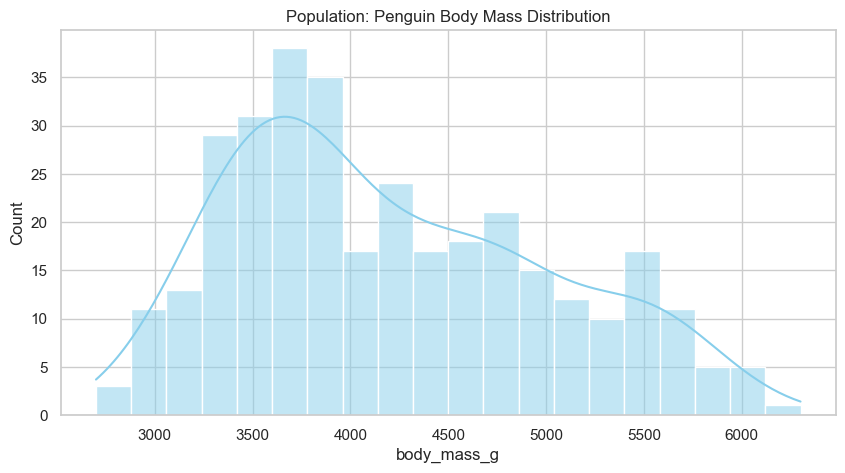

In [4]:
# Let's focus on body_mass_g as the main variable
plt.figure(figsize=(10, 5))
sns.histplot(penguins['body_mass_g'], bins=20, kde=True, color='skyblue')
plt.title("Population: Penguin Body Mass Distribution")
plt.show()

## **Biased Sample**

A **biased sample** is a sample that does **not represent the whole population fairly**. It happens when **some groups are included more than others**, either on purpose or by mistake. This can lead to incorrect or misleading results.

### Why is it important?

If your sample is biased, your analysis or prediction may be wrong because it doesn't reflect the true variety or proportions in the full dataset.

In [14]:
# Pick only one species (e.g., Adelie)
biased_sample = penguins[penguins['species'] == 'Adelie'].sample(40)
biased_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male
121,Adelie,Torgersen,37.7,19.8,198.0,3500.0,Male
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
45,Adelie,Dream,39.6,18.8,190.0,4600.0,Male
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
135,Adelie,Dream,41.1,17.5,190.0,3900.0,Male
99,Adelie,Dream,43.2,18.5,192.0,4100.0,Male
86,Adelie,Dream,36.3,19.5,190.0,3800.0,Male
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,Female


## **Simple Random Sample (SRS)**

A **Simple Random Sample** means selecting data points **completely at random** from the entire dataset.  
In this method, **every row has an equal chance** of being chosen, without any filtering or grouping.

This type of sampling is:
- **Unbiased** (if done correctly)
- Easy to understand and implement
- Useful when the population is fairly uniform

---

###  Why use it?

Simple Random Sampling gives a **quick and fair snapshot** of the full dataset — it doesn’t focus on any group or category.




In [12]:
# Simple random sample (no stratification)
random_sample = penguins.sample(40)
random_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,Male
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,Male
255,Gentoo,Biscoe,48.4,16.3,220.0,5400.0,Male
274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,Female
307,Gentoo,Biscoe,51.3,14.2,218.0,5300.0,Male
99,Adelie,Dream,43.2,18.5,192.0,4100.0,Male
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,Female
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
85,Adelie,Dream,41.3,20.3,194.0,3550.0,Male
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,Male


## **Stratified Sampling**

**Stratified Sampling** is a technique where the dataset is first divided into **distinct groups** (called *strata*), and then a **sample is taken from each group**.  
This ensures that **each group is fairly represented** in the final sample.

###  Why use it?

Stratified sampling is helpful when:
- Your dataset has **subgroups** (like species, gender, region)
- You want to ensure **each subgroup is included** in the sample
- You want more accurate and balanced analysis across categories


In [17]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [19]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [25]:
# Simple lambda function
x= lambda a,b:a+b
x(2,3)

5

In [21]:
# Stratified sampling (sample evenly from species groups)
stratified_sample = penguins.groupby('species', group_keys=False).apply(lambda x: x.sample(15, random_state=42))
stratified_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
51,Adelie,Biscoe,40.1,18.9,188.0,4300.0,Male
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,Male
32,Adelie,Dream,39.5,17.8,188.0,3300.0,Female
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,Male
48,Adelie,Dream,36.0,17.9,190.0,3450.0,Female
126,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female
34,Adelie,Dream,36.4,17.0,195.0,3325.0,Female
86,Adelie,Dream,36.3,19.5,190.0,3800.0,Male
72,Adelie,Torgersen,39.6,17.2,196.0,3550.0,Female
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male


## **Bootstrap Sampling**

**Bootstrap Sampling** is a method where we take a **sample with replacement** from an existing dataset.  
This means the **same row can be picked more than once**. It's useful for estimating statistics and building confidence intervals when the original data is limited.

###  Why use it?

Bootstrap helps when:
- You want to understand **variability or uncertainty** in your data
- You have **a small sample** and want to create many "simulated" samples
- You need to perform **resampling-based analysis**, like estimating confidence intervals


In [33]:
# Bootstrap sampling (sampling with replacement from random_sample)
random_sample
bootstrap_sample = random_sample.sample(n=40, replace=True)
bootstrap_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
307,Gentoo,Biscoe,51.3,14.2,218.0,5300.0,Male
113,Adelie,Biscoe,42.2,19.5,197.0,4275.0,Male
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,Male
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,Male
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,Female
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
307,Gentoo,Biscoe,51.3,14.2,218.0,5300.0,Male
202,Chinstrap,Dream,48.1,16.4,199.0,3325.0,Female
202,Chinstrap,Dream,48.1,16.4,199.0,3325.0,Female
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,Female


## **Resampling (Multiple Bootstrap Samples)**

###  What is Resampling?

Resampling means creating **multiple samples** from the same dataset.  
This helps us see how much our results (like average or total) can **change naturally**.

We usually do this using **bootstrap sampling** — which means **picking with replacement** (so the same data point can appear more than once).

---

###  Simple Real-Life Example

Imagine you have a basket of 40 apples.  
You want to check the **average weight** of apples, but you're not sure if your first sample was perfect.

So, you:

1. Randomly pick 40 apples **with replacement** (some apples can repeat) → This is **Resample 1**
2. Repeat the process again → **Resample 2**
3. And again → **Resample 3**

Each resample is a **slightly different mix** of apples.  
Then you calculate the **average weight** in each one.

---


In [35]:
# Resampling: multiple bootstrap samples
resamples = [random_sample.sample(n=40, replace=True) for _ in range(3)]
resamples

[       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 113     Adelie     Biscoe            42.2           19.5              197.0   
 264     Gentoo     Biscoe            50.5           15.9              222.0   
 227     Gentoo     Biscoe            46.7           15.3              219.0   
 262     Gentoo     Biscoe            45.3           13.7              210.0   
 113     Adelie     Biscoe            42.2           19.5              197.0   
 332     Gentoo     Biscoe            43.5           15.2              213.0   
 299     Gentoo     Biscoe            45.2           16.4              223.0   
 198  Chinstrap      Dream            50.1           17.9              190.0   
 212  Chinstrap      Dream            51.9           19.5              206.0   
 70      Adelie  Torgersen            33.5           19.0              190.0   
 198  Chinstrap      Dream            50.1           17.9              190.0   
 255     Gentoo     Biscoe            48

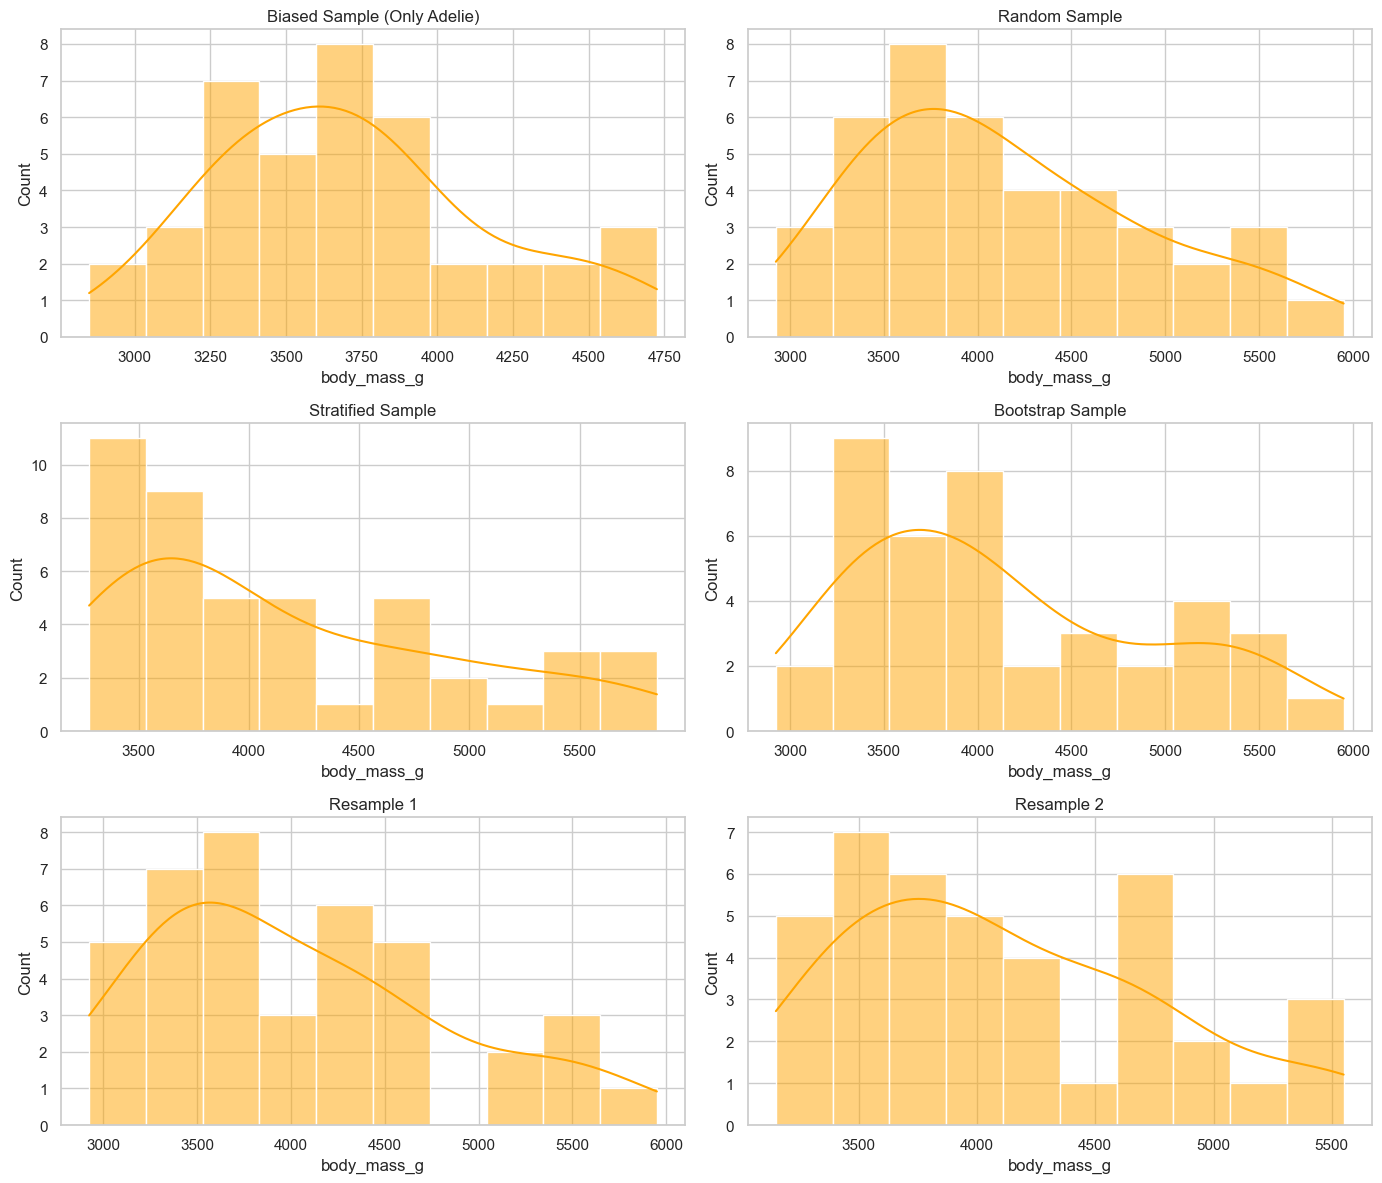

In [37]:
# Plot function
def plot_distribution(data, ax, title):
    sns.histplot(data['body_mass_g'], bins=10, kde=True, ax=ax, color='orange')
    ax.set_title(title)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

plot_distribution(biased_sample, axes[0], "Biased Sample (Only Adelie)")
plot_distribution(random_sample, axes[1], "Random Sample")
plot_distribution(stratified_sample, axes[2], "Stratified Sample")
plot_distribution(bootstrap_sample, axes[3], "Bootstrap Sample")
plot_distribution(resamples[0], axes[4], "Resample 1")
plot_distribution(resamples[1], axes[5], "Resample 2")

plt.tight_layout()
plt.show()

# Skewness and Kurtosis

This notebook covers the concepts of skewness and kurtosis, which are important statistical measures that describe the shape of a distribution. Each section includes definitions, explanations, and multiple examples.

## **1. Skewness (Tilt of Data)**

Skewness tells us if the data is unevenly spread around the average (mean). It shows whether the values are more to one side.

- **Positive Skew (Right Skew)**: The graph stretches more to the right side. This means most values are small, but a few are very large.
- **Negative Skew (Left Skew)**: The graph stretches more to the left side. This means most values are large, but a few are very small.

We can also use a number to show skewness:
- If skewness > 0 → the data is positively skewed (tilted to the right).
- If skewness < 0 → the data is negatively skewed (tilted to the left).
- If skewness = 0 → the data is evenly spread on both sides (symmetrical).

###  Acceptable Range for Skewness:

- **-0.5 to +0.5** → Data is approximately **symmetrical** (no strong skewness).
- **-1 to -0.5 or +0.5 to +1** → Data is **moderately skewed**.
- **Less than -1 or greater than +1** → Data is **highly skewed** and may need transformation.


In [40]:
# Example of Skewness
import numpy as np
from scipy.stats import skew

# Sample data with positive skew
data_positive_skew = np.array([1,2,3,4,5,6,7,8,9])
# Sample data with negative skew
data_negative_skew = np.array([1,2,3,4,5,2,3,4,6,7,8,9,10,11,12,13,14,12,13,12,13,14,15,12,11,13,14,15,13,18,20])

# Calculate skewness
skew_positive = skew(data_positive_skew)
skew_negative = skew(data_negative_skew)

skew_positive, skew_negative

(0.0, -0.23953633720185108)

In [42]:
# Let's add outliers in both the data (500 and -200)
data_positive_skew = np.array([1,2,3,4,5,6,7,8,9,500])
data_negative_skew = np.array([1,2,3,4,5,2,3,4,6,7,8,9,10,11,12,13,14,12,13,12,13,14,15,12,11,13,14,15,13,18,20,-200])
skew_positive = skew(data_positive_skew)
skew_negative = skew(data_negative_skew)

skew_positive, skew_negative            # Do not get confused with the name as positive or negative, it's a variable name. We can use anything.

(2.6653067422933887, -5.238893016807499)

### **Additional Examples of Skewness**

1. **Data with Extreme Positive Skew**:  
   Example: [1, 2, 2, 3, 4, 5, 6, 7, 50]
   - Skewness will be significantly greater than 0, indicating a strong rightward tail.

2. **Data with Extreme Negative Skew**:  
   Example: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
   - Skewness will be less than 0, indicating a strong leftward tail.

In [47]:
# Additional examples of skewness
# Extreme positive skew data
data_extreme_positive_skew = np.array([1,2,2,3,4,5,6,7,50])
# Extreme negative skew data
data_extreme_negative_skew = np.array([10,20,30,40,50,60,70,80,90,65,68,74,55,67,76,88,86,85,74,73,100])

# Calculate skewness for additional examples
skew_extreme_positive = skew(data_extreme_positive_skew)
skew_extreme_negative = skew(data_extreme_negative_skew)

skew_extreme_positive, skew_extreme_negative

(2.398033954270445, -0.862166314611518)

### **Interpretation of Skewness Results**
- For the first positive skew data, the skewness value will indicate a rightward tail.
- For the first negative skew data, the skewness value will indicate a leftward tail.
- The extreme cases will show more pronounced skewness values, reflecting the presence of outliers.

## **2. Kurtosis (Peak and Tails of Data)**

Kurtosis tells us how the data is spread in the tails (ends) of the graph. It shows whether there are more or fewer extreme values (outliers) compared to normal data.

- **High Kurtosis**: The graph has fatter tails. This means there are more extreme values (outliers).
- **Low Kurtosis**: The graph has thinner tails. This means fewer extreme values, and most data points are close to the average.

We can also use a number to show kurtosis:
- If kurtosis > 3 → More extreme values than normal (called **leptokurtic**).
- If kurtosis < 3 → Fewer extreme values than normal (called **platykurtic**).
- If kurtosis = 3 → Same as normal distribution (called **mesokurtic**).

###  Acceptable Range for Kurtosis:

- **2.5 to 3.5** → Generally considered **normal** or acceptable.
- **Below 2.5** → May have **too few outliers** (flat-topped).
- **Above 3.5** → May have **too many outliers** (peaked and heavy tails).

**High Kurtosis**: Indicates a sharp peak and heavy tails.

**Low Kurtosis**: Indicates a flatter distribution.

In [52]:
# Example of Kurtosis
from scipy.stats import kurtosis
import numpy as np
# Sample data with high kurtosis
data_high_kurtosis = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,200])
# Sample data with low kurtosis
data_low_kurtosis = np.array([1,2,1000,2000,3000,4000,5000,6000,7000,8000,9000])

# Calculate kurtosis
kurtosis_high = kurtosis(data_high_kurtosis)
kurtosis_low = kurtosis(data_low_kurtosis)

kurtosis_high, kurtosis_low

(8.868382339726288, -1.3021071104265223)

### **Additional Examples of Kurtosis**

1. **Data with Extreme High Kurtosis**:  
   Example: [1, 1, 1, 1, 2, 3, 4, 5, 6, 100]
   - Kurtosis will be significantly greater than 3, indicating heavy tails with extreme values.

2. **Data with Extreme Low Kurtosis**:  
   Example: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
   - Kurtosis will be less than 3, indicating light tails with fewer extreme values.

In [55]:
# Additional examples of kurtosis
# Extreme high kurtosis data
data_extreme_high_kurtosis = np.array([1,1,1,1,2,3,4,5,6,100])
# Extreme low kurtosis data
data_extreme_low_kurtosis = np.array([1,2,3,4,5,6,7,8,9,10])

# Calculate kurtosis for additional examples
kurtosis_extreme_high = kurtosis(data_extreme_high_kurtosis)
kurtosis_extreme_low = kurtosis(data_extreme_low_kurtosis)

kurtosis_extreme_high, kurtosis_extreme_low

(5.056510879582133, -1.2242424242424244)

### **Interpretation of Kurtosis Results**
- For the high kurtosis data, the kurtosis value will be significantly greater than 3, indicating that there are more outliers.
- For the low kurtosis data, the kurtosis value will be less than 3, suggesting that the data is less prone to extreme values.
- The extreme cases will illustrate how the presence of a few outliers can dramatically affect kurtosis.